<center><img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" /></center>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 Introducción al Aprendizaje Automático  2021-2 </h1>

<H3 align='center'> Ayudantía 6: Selección de Características </H3>

----

<H3 align='center'> <b>Profesor: Ricardo Ñanculef </b> </H3>
<H3 align='center'> <b>Ayudantes: Álvaro Fuentes, Mario Mallea </b> </H3>



<hr style="height:2px;border:none"/>

# Motivación

Como ya pueden ir intuyendo, una adecuada representación de los datos es fundamental para obtener buenos resultados en aprendizaje automático. A grandes rasgos los motivos pueden ser:

* Hacer el modelo más comprensible.

* Eficiencia computacional en tiempo y espacio.

* Lidiar con la maldición de la dimensionalidad.

* Evitar overfitting.

Los métodos de selección se pueden organizar en 3 grandes grupos#

* Métodos tipo Wrapper: utilizar el modelo (o técnica de aprendizaje) como caja negra para *evaluar* el efecto de una variable.

* Métodos Embedidos: diseñados específicamente para un tipo de modelo o técnica de aprendizaje.

* Métodos de filtrado: asignar un puntaje a cada característica de manera independiente al modelo o técnica. 

    * Filtrado individual: asociaciones individuales, ignorando efectos en conjunto de atributos. 

    * Filtrado colectivo: toman en cuenta interacciones entre atributos. 


In [1]:
# hacer la conexión a Google Drive

from google.colab import drive

colab_flag = True

path = ''

if (colab_flag): # en caso de usar Google Drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/Machine_Learning'
    

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# NASA JPL Asteroid Dataset 

![Asteroid](https://www.sciencenewsforstudents.org/wp-content/uploads/2019/11/860_meteorite_diamonds.png)

Vamos a trabajar sobre un dataset que contiene todo tipo de datos relacionados a asteroides. Los datos provienen del Jet Propulsion Laboratory (organización manejada por NASA) y pueden ser descargados desde: 

https://www.kaggle.com/sakhawat18/asteroid-dataset

El objetivo será  **Predecir la clase de un asteroide** a partir de características numéricas del objeto.

In [3]:

if (colab_flag): 
    data_asteroid = pd.read_csv(path + '/Asteroid_dataset.csv')
else: 
    data_asteroid = pd.read_csv('Asteroid_dataset.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(data_asteroid.shape)
data_asteroid.head()

(958524, 45)


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433028,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


Al trabajar con este tipo de dataset, muchas veces no estarán los datos completos: puede que existan celdas sin valores (NaN).

En este dataset revisaremos cuantos datos faltan por columna:

In [5]:
# revisar cuantos datos faltan por columna
print("Número de datos NaN por feature (columna): \n")
print(data_asteroid.isnull().sum(axis = 0))

Número de datos NaN por feature (columna): 

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma

Podemos ver que hay columnas con muchos valores NaN. Se decide simplemente eliminar filas de datos que tienen un valor NaN. 

Como nuestro objetivo es Predecir la clase de un asteroide, se eliminan columnas no interesantes para nuestro propósito (tales como nombres, id, flags, marcos de referencias, etc.)

In [6]:
# borrar columnas no interesantes para el propósito de este notebook
del data_asteroid["id"]
del data_asteroid["spkid"]
del data_asteroid["full_name"]
del data_asteroid["pdes"]
del data_asteroid["name"]
del data_asteroid["prefix"]

del data_asteroid["neo"]
del data_asteroid["pha"]

del data_asteroid["epoch"]
del data_asteroid["epoch_mjd"]
del data_asteroid["epoch_cal"]
del data_asteroid["equinox"]
del data_asteroid["orbit_id"]

# borrar filas con NaN
columns_with_nan = [] 
for (i, number_nan) in enumerate(data_asteroid.isnull().sum(axis = 0)):
    if (number_nan > 0):
        columns_with_nan.append( data_asteroid.columns[i] )

data_asteroid_ = data_asteroid.copy()
for col in columns_with_nan:
    data_asteroid_ =  data_asteroid_[data_asteroid_[col].notna()]

In [7]:
print(data_asteroid_.shape)

print("Número de datos NaN por feature (columna): \n")
print(data_asteroid_.isnull().sum(axis = 0))


(131142, 32)
Número de datos NaN por feature (columna): 

H                 0
diameter          0
albedo            0
diameter_sigma    0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
tp_cal            0
per               0
per_y             0
moid              0
moid_ld           0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
class             0
rms               0
dtype: int64


A continuación se analiza distribuciones de las clases. Notaremos que hay clases cuya cantidad de datos es varios ordenes de magnitud respecto a otras. Es por ello que vamos a restringir la predicción a las clases "más balanceadas" en número de ejemplos, las cuales son las siguientes: 

**ATE:** Aten	

**CEN:** Centaur

**IMB:** Inner Main-belt Asteroid

**MCA:** Mars-crossing Asteroid	

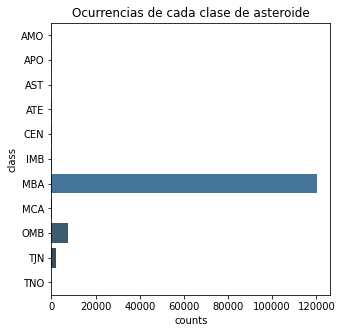

['ATE' 'CEN' 'IMB' 'MCA']


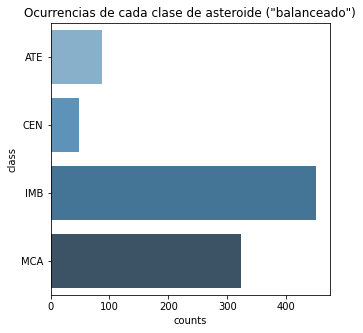

In [8]:
# analizar distribuciones de las clases 

clases = np.unique([str(item) for item in data_asteroid_['class'].values])

kd = data_asteroid_.groupby(['class']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(5,5),nrows=1)
sns.barplot(data=kd, y='class', x='counts', palette="Blues_d",ax=ax)
ax.set_title('Ocurrencias de cada clase de asteroide')
plt.show()


# dejar solo clases "más balanceadas" en número de ejemplos. Los codigos comentados corresponden a las clases que se van a preservar.

data_asteroid_balanced = data_asteroid_[data_asteroid_["class"] != 'AMO']
data_asteroid_balanced = data_asteroid_balanced[data_asteroid_balanced["class"]  != 'APO']
data_asteroid_balanced = data_asteroid_balanced[data_asteroid_balanced["class"]  != 'AST']
#data_asteroid_balanced = data_asteroid_balanced[data_asteroid_balanced["class"]  != 'ATE']
#data_asteroid_balanced = data_asteroid_balanced[data_asteroid_balanced["class"]  != 'CEN']
data_asteroid_balanced = data_asteroid_balanced[data_asteroid_balanced["class"]  != 'MBA']
data_asteroid_balanced = data_asteroid_balanced[data_asteroid_balanced["class"]  != 'TNO']
data_asteroid_balanced = data_asteroid_balanced[data_asteroid_balanced["class"]  != 'OMB']
data_asteroid_balanced = data_asteroid_balanced[data_asteroid_balanced["class"]  != 'TJN']
#data_asteroid_balanced = data_asteroid_balanced[data_asteroid_balanced["class"]  != 'IMBA']
#data_asteroid_balanced = data_asteroid_balanced[data_asteroid_balanced["class"]  != 'MCA']



clases = np.unique([str(item) for item in data_asteroid_balanced['class'].values])
print(clases)


kd = data_asteroid_balanced.groupby(['class']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(5,5),nrows=1)
sns.barplot(data=kd, y='class', x='counts', palette="Blues_d",ax=ax)
ax.set_title('Ocurrencias de cada clase de asteroide ("balanceado")')
plt.show()


In [9]:
# Definir features numericos (lo haremos para diferenciar despues X de Y ).
# En este caso, como eliminamos columnas con valores categóricos en lineas anteriores, la única columna no numérica es 'class'.  

non_categorical_asteriod = list(data_asteroid_balanced.columns)
non_categorical_asteriod.remove('class') 


A continuación veremos como se distribuyen los valores de una columna (feature) en las distintas clases. Para ello usaremos una herramienta de visualización que nos permite ver un histograma con la densidad de valores. 

Podemos apreciar que en features como "H" los valores se distribuyen de forma bien diferenciada dependiendo de la clase. Esto nos puede dar una pista de que el modelo podría aprovechar este feature para separar las clases entre sí. Por otro lado, existen columnas como "om" en donde los valores se distribuyen de forma similar para todas las clases, dificultando la separación de clases.


In [10]:
len(data_asteroid_balanced.columns)

lista_clases = np.unique(data_asteroid_balanced['class'])
print(lista_clases)
print(len(lista_clases))

['ATE' 'CEN' 'IMB' 'MCA']
4


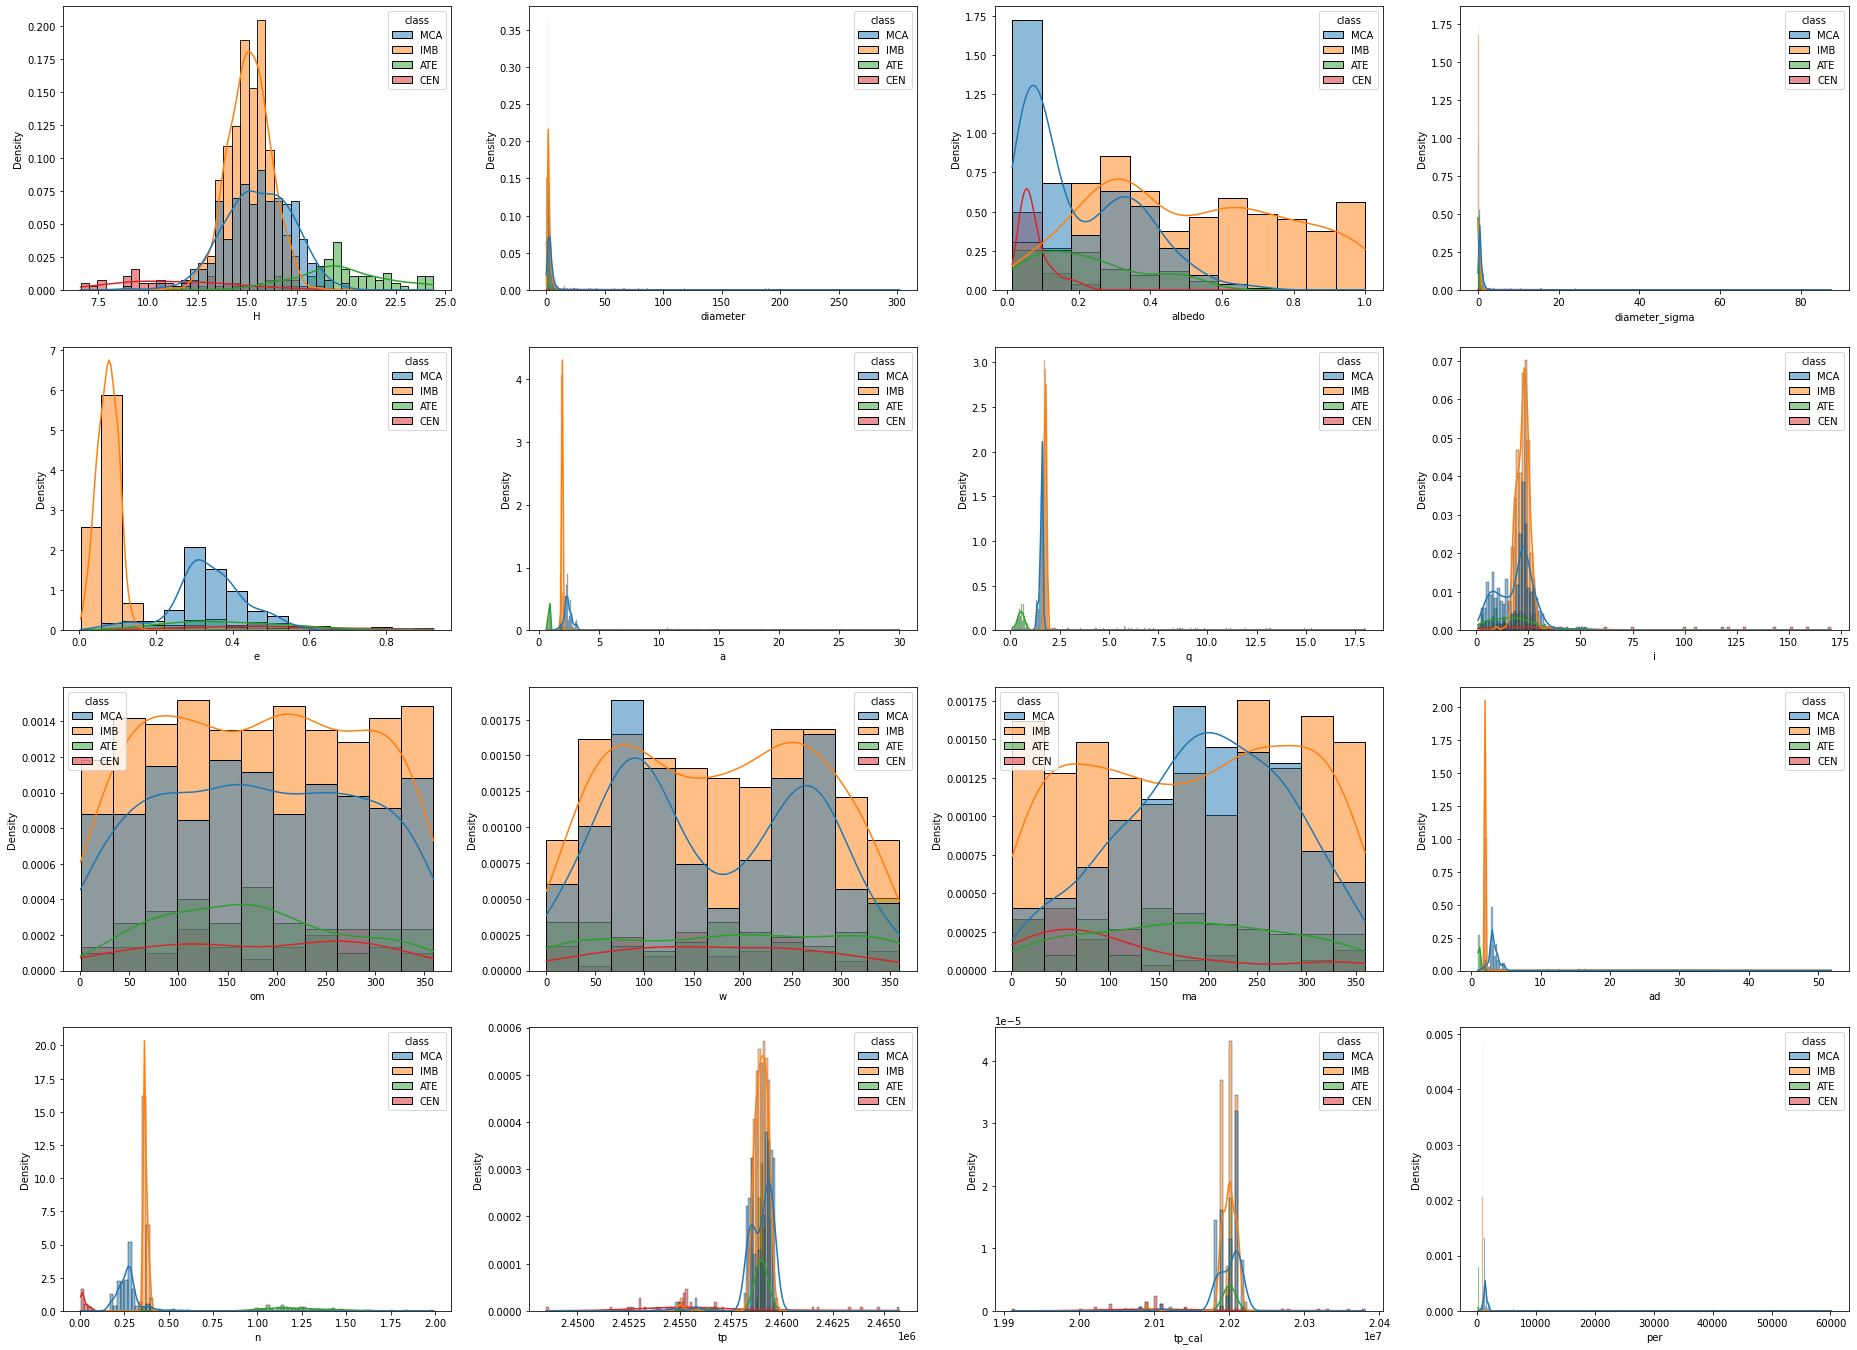

In [11]:

fig = plt.figure(figsize=(32,24))
#fig.subplots_adjust( wspace=0.1, hspace=0.3)

idx = 1
for i, column in enumerate(data_asteroid_balanced.columns[:16]):
    
    ax = fig.add_subplot(4, 4, idx)
    idx+=1
    
    sns.histplot(data=data_asteroid_balanced, x=column, hue="class", kde = True, stat = "density")


In [12]:
# Lo dejo comentado porque se come la RAM de colab
'''
fig = plt.figure(figsize=(32,24))
idx = 1
for i, column in enumerate(data_asteroid_balanced.columns[16:]):
    
    ax = fig.add_subplot(4, 4, idx)
    idx+=1
    
    sns.histplot(data=data_asteroid_balanced, x=column, hue="class", kde = True, stat = "density")
'''

'\nfig = plt.figure(figsize=(32,24))\nidx = 1\nfor i, column in enumerate(data_asteroid_balanced.columns[16:]):\n    \n    ax = fig.add_subplot(4, 4, idx)\n    idx+=1\n    \n    sns.histplot(data=data_asteroid_balanced, x=column, hue="class", kde = True, stat = "density")\n'

In [13]:
from sklearn.model_selection import train_test_split

# Separar datos para el posterior entrenamiento, validación y test

# Split de datos
X = data_asteroid_balanced[non_categorical_asteriod]
y = data_asteroid_balanced['class']

y_ = y.copy()

print(X.shape)
print(y_.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("X,y Shapes:", X.shape, y.shape)
print("X,y Train Shapes:", X_train.shape, y_train.shape)
print("X,y Val Shapes:", X_val.shape, y_val.shape)
print("X,y Test Shapes:", X_test.shape, y_test.shape)

X_train.head()

(910, 31)
(910,)
X,y Shapes: (910, 31) (910,)
X,y Train Shapes: (582, 31) (582,)
X,y Val Shapes: (146, 31) (146,)
X,y Test Shapes: (182, 31) (182,)


,H,diameter,albedo,diameter_sigma,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
67377,15.7,3.222,0.074,0.343,0.045039,1.986439,1.896971,19.324551,290.319692,315.772461,85.308548,2.075907,0.352039,2.458758e+06,2.019100e+07,1022.612867,2.799761,0.898297,349.590243,3.690400e-08,7.775100e-09,7.413300e-08,0.000007,0.000012,0.000081,0.000081,8.125300e-09,2.066900e-09,0.000229,0.000006,0.48556
676043,17.1,2.029,0.047,0.481,0.060729,1.870714,1.757106,14.844674,61.006012,342.402142,132.365127,1.984321,0.385206,2.454988e+06,2.009061e+07,934.564802,2.558699,0.769016,299.277957,7.637000e-01,2.285400e+00,3.554500e+00,5.389700,33.527000,587.210000,557.300000,2.424200e+00,7.058800e-01,833.020000,1712.600000,0.13881
16680,14.3,4.328,0.230,0.053,0.063641,1.893439,1.772940,23.416223,342.481955,63.934531,125.466279,2.013939,0.378292,2.458669e+06,2.019070e+07,951.646304,2.605466,0.817502,318.147253,6.523800e-08,6.973600e-09,1.207900e-07,0.000006,0.000009,0.000056,0.000050,7.417400e-09,2.089900e-09,0.000133,0.000005,0.40610
677905,16.5,2.816,0.056,0.595,0.371763,2.194821,1.378867,27.434525,71.133017,35.802738,251.144433,3.010776,0.303114,2.454529e+06,2.008030e+07,1187.673883,3.251674,0.440214,171.318082,1.240800e+00,3.308800e+00,4.586600e+00,9.337900,63.733000,182.490000,158.900000,4.538900e+00,6.854400e-01,2248.600000,2685.700000,0.35743
3168,12.7,4.662,0.960,0.118,0.066634,1.892181,1.766097,24.906466,96.372205,32.672842,139.137595,2.018265,0.378669,2.458633e+06,2.019053e+07,950.697421,2.602868,0.796836,310.104666,3.484800e-08,5.415000e-09,6.694700e-08,0.000006,0.000012,0.000054,0.000052,5.775800e-09,1.625500e-09,0.000137,0.000004,0.33411


### iloc v/s loc

Para un ejemplo de más adelante necesitaremos los "indices" de los datos de validación. 

Aprovecharemos de revisar los indices de Panda: ```iloc v/s loc```

In [14]:
# voy a guardar los indices de validacion
val_indexs = X_val.index.values
print(X_val.head(3))
print(X.loc[val_indexs].head(3))

# notar que son iguales

           H  diameter  albedo  ...  sigma_tp  sigma_per      rms
762320  18.8     1.058   0.048  ...  0.060751   0.030502  0.51236
409033  17.8     1.766   0.047  ...  0.000031   0.000007  0.52175
2271    13.7     5.328   0.165  ...  0.000071   0.000003  0.38241

[3 rows x 31 columns]
           H  diameter  albedo  ...  sigma_tp  sigma_per      rms
762320  18.8     1.058   0.048  ...  0.060751   0.030502  0.51236
409033  17.8     1.766   0.047  ...  0.000031   0.000007  0.52175
2271    13.7     5.328   0.165  ...  0.000071   0.000003  0.38241

[3 rows x 31 columns]


In [15]:
X.index.get_loc(762320) 

881

In [16]:
val_row_nums = [X.index.get_loc(index) for index in val_indexs]
print(val_row_nums[0])
X.iloc[val_row_nums[0]]

881


H                 1.880000e+01
diameter          1.058000e+00
albedo            4.800000e-02
diameter_sigma    2.510000e-01
e                 3.459931e-01
a                 2.228323e+00
q                 1.457339e+00
i                 2.360711e+01
om                9.785835e+01
w                 8.275920e+01
ma                2.942618e+02
ad                2.999308e+00
n                 2.963035e-01
tp                2.459222e+06
tp_cal            2.021011e+07
per               1.214970e+03
per_y             3.326408e+00
moid              6.536030e-01
moid_ld           2.543627e+02
sigma_e           1.028700e-05
sigma_a           3.729500e-05
sigma_q           2.781300e-05
sigma_i           6.642600e-04
sigma_om          2.168700e-04
sigma_w           1.914100e-03
sigma_ma          1.635100e-02
sigma_ad          5.019800e-05
sigma_n           7.438700e-06
sigma_tp          6.075100e-02
sigma_per         3.050200e-02
rms               5.123600e-01
Name: 762320, dtype: float64

### StandardScaler

Viendo directamente los histogramas anteriores se puede concluir que las columnas tienen rango de valores muy distintos. Para estos casos, estandarizar los datos antes de aplicar un modelo nos ayudará a obtener mejores resultados. 

In [17]:
from sklearn.preprocessing import StandardScaler

# Scaling
scaler = StandardScaler() # Standardize features by removing the mean and scaling to unit variance

scaler.fit(X_train)

X_train= scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Notar que perdemos informacion de dataframe de esta forma

## Modelo: LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [19]:
print(y_train.shape)
X_train.shape

(582,)


(582, 31)

In [20]:
model1 = LogisticRegression(verbose=1, solver='liblinear', random_state=0, C=2, max_iter=20)
model1.fit(X_train, y_train) 

[LibLinear]

LogisticRegression(C=2, max_iter=20, random_state=0, solver='liblinear',
                   verbose=1)

Accuracy Validation:  0.9863013698630136
F1 score Validation (micro):  0.9863013698630136

Matriz de confusión Modelo 1 sobre Validation


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'confusion val')

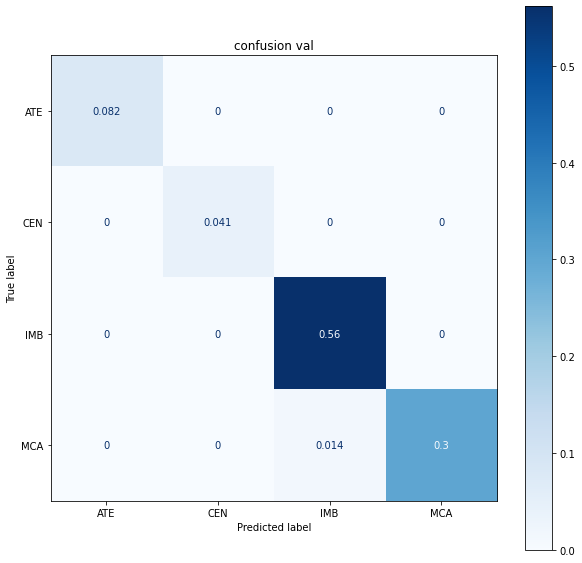

In [21]:
prediccion1 = model1.predict(X_val)

print("Accuracy Validation: ", accuracy_score(y_val, prediccion1))
print("F1 score Validation (micro): ", f1_score(y_val, prediccion1, average='micro'))

print("\nMatriz de confusión Modelo 1 sobre Validation")
fig, ax = plt.subplots(figsize=(10, 10))

disp = plot_confusion_matrix(model1, X_val, y_val, display_labels=model1.classes_, cmap=plt.cm.Blues,normalize='all', ax = ax)
disp.ax_.set_title("confusion val")


## Wrapper: Forward Stepwise Selection

#### A mano

In [22]:
def filter_by_index(X, F):
    return np.array([X[:, index] for index in F]).T

def forward_stepwise_selection(x, y, x_val, y_val, columns, max_features = 10, debug = False):
    criteria = True
    F_ = []
    while(criteria): 
        F = F_.copy()
        S_i = []
        for i, column in enumerate(columns):
            if (i in F_):
                continue

            if (debug):
                print(F)
                
            F.append(i)
            model = LogisticRegression(verbose=0, solver='liblinear', random_state=0, C=2, max_iter=20)
            
            new_train = filter_by_index(x, F)
            model.fit(new_train, y) 

            new_val = filter_by_index(x_val, F)
            prediccion = model.predict(new_val)

            S_i.append( f1_score(y_val, prediccion, average='micro') )
        
        best_i = np.argmax(S_i)
        if (debug):
            print(S_i)
        if (len(F_) < max_features):
            F_.append(F[best_i])
        else: 
            criteria = False
    return F_

In [23]:
reduced_features = forward_stepwise_selection(X_train, y_train, X_val, y_val, non_categorical_asteriod)

In [24]:
print(reduced_features)

[non_categorical_asteriod[i] for i in reduced_features]

[19, 17, 15, 13, 11, 9, 7, 5, 3, 1]


['sigma_e',
 'moid',
 'per',
 'tp',
 'ad',
 'w',
 'i',
 'a',
 'diameter_sigma',
 'diameter']

In [25]:
new_train = filter_by_index(X_train, reduced_features)
new_train.shape

(582, 10)

Accuracy Validation:  0.9383561643835616
F1 score Validation (micro):  0.9383561643835615

Matriz de confusión Modelo 1 sobre Validation


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'confusion val')

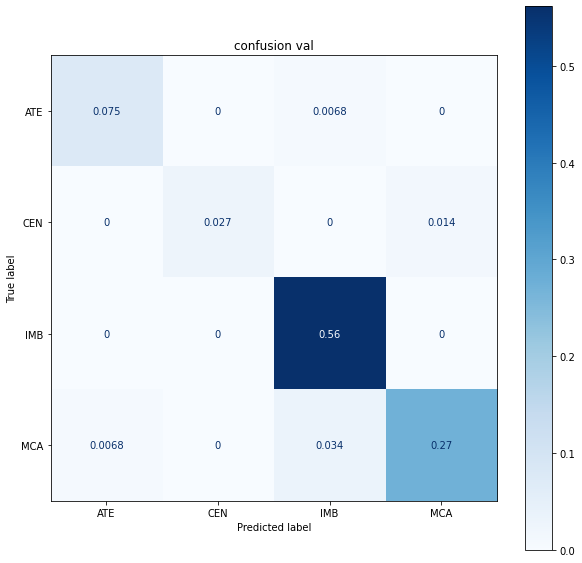

In [26]:
new_train = filter_by_index(X_train, reduced_features)
new_val = filter_by_index(X_val, reduced_features)

model = LogisticRegression(verbose=0, solver='liblinear', random_state=0, C=2, max_iter=20)  
model.fit(new_train, y_train) 

prediccion1 = model.predict(new_val)

print("Accuracy Validation: ", accuracy_score(y_val, prediccion1))
print("F1 score Validation (micro): ", f1_score(y_val, prediccion1, average='micro'))

print("\nMatriz de confusión Modelo 1 sobre Validation")
fig, ax = plt.subplots(figsize=(10, 10))

disp = plot_confusion_matrix(model, new_val, y_val, display_labels=model.classes_, cmap=plt.cm.Blues,normalize='all', ax = ax)
disp.ax_.set_title("confusion val")



####  Via librería

In [27]:
!pip install mlxtend

In [28]:
# http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/


from mlxtend.evaluate import PredefinedHoldoutSplit

import joblib
import sys

sys.modules['sklearn.externals.joblib'] = joblib


from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [29]:

piter = PredefinedHoldoutSplit(val_row_nums)

# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(verbose=0, solver='liblinear', random_state=0, C=2, max_iter=20),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'accuracy',
          cv = piter)

In [30]:
sfs.fit(X, y_)
print('Selected features:', sfs.k_feature_idx_)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Selected features: (0, 3, 4, 5, 6, 7, 9, 11, 15, 18)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

In [31]:
print([non_categorical_asteriod[i] for i in reduced_features])

[non_categorical_asteriod[i] for i in sfs.k_feature_idx_]

['sigma_e', 'moid', 'per', 'tp', 'ad', 'w', 'i', 'a', 'diameter_sigma', 'diameter']


['H', 'diameter_sigma', 'e', 'a', 'q', 'i', 'w', 'ad', 'per', 'moid_ld']

In [32]:
sfs.k_feature_idx_

(0, 3, 4, 5, 6, 7, 9, 11, 15, 18)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(582, 10)
Accuracy Validation:  0.9657534246575342
F1 score Validation (micro):  0.9657534246575342

Matriz de confusión Modelo 1 sobre Validation


Text(0.5, 1.0, 'confusion val')

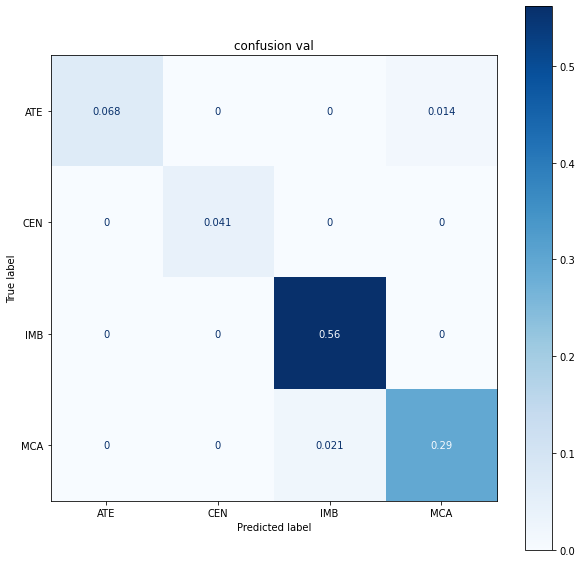

In [33]:
new_train = filter_by_index(X_train, sfs.k_feature_idx_)
new_val = filter_by_index(X_val, sfs.k_feature_idx_)
print(new_train.shape)
model = LogisticRegression(verbose=0, solver='liblinear', random_state=0, C=2, max_iter=20)  
model.fit(new_train, y_train) 

prediccion1 = model.predict(new_val)

print("Accuracy Validation: ", accuracy_score(y_val, prediccion1))
print("F1 score Validation (micro): ", f1_score(y_val, prediccion1, average='micro'))

print("\nMatriz de confusión Modelo 1 sobre Validation")
fig, ax = plt.subplots(figsize=(10, 10))

disp = plot_confusion_matrix(model, new_val, y_val, display_labels=model.classes_, cmap=plt.cm.Blues,normalize='all', ax = ax)
disp.ax_.set_title("confusion val")



## Embedido: Regularización Lasso 

In [34]:
from sklearn.feature_selection import SelectFromModel
# https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499


In [35]:
sel_ = SelectFromModel(LogisticRegression(verbose=1, solver='liblinear', random_state=0, C=2, max_iter=30, penalty='l1'))
sel_.fit(X_train, y_train)


[LibLinear]

SelectFromModel(estimator=LogisticRegression(C=2, max_iter=30, penalty='l1',
                                             random_state=0, solver='liblinear',
                                             verbose=1))

Aparecen con True aquellas caracteristicas no nulas, mientras que False aparecen aquellas que descienden a cero con Lasso. 


In [36]:
print(sel_.get_support().size)
sel_.get_support()


31


array([ True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True, False,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True, False, False,
       False, False,  True, False])

In [37]:
relevant_lasso = [non_categorical_asteriod[i] for i, cond in enumerate(sel_.get_support()) if cond == True]

print(relevant_lasso)
print(len(relevant_lasso))

['H', 'albedo', 'diameter_sigma', 'e', 'a', 'i', 'om', 'w', 'ma', 'n', 'tp_cal', 'moid', 'moid_ld', 'sigma_e', 'sigma_q', 'sigma_om', 'sigma_w', 'sigma_per']
18


(582, 18)
Accuracy Validation:  0.9863013698630136
F1 score Validation (micro):  0.9863013698630136

Matriz de confusión Modelo 1 sobre Validation


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'confusion val')

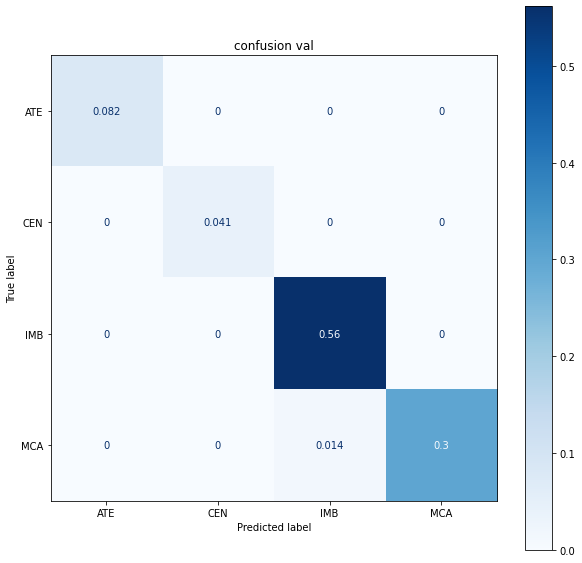

In [38]:
relevant_indexs = [i for i, cond in enumerate(sel_.get_support()) if cond == True]

new_train = filter_by_index(X_train, relevant_indexs)
new_val = filter_by_index(X_val, relevant_indexs)
print(new_train.shape)

model = LogisticRegression(verbose=0, solver='liblinear', random_state=0, C=2, max_iter=20)  
model.fit(new_train, y_train) 

prediccion1 = model.predict(new_val)

print("Accuracy Validation: ", accuracy_score(y_val, prediccion1))
print("F1 score Validation (micro): ", f1_score(y_val, prediccion1, average='micro'))

print("\nMatriz de confusión Modelo 1 sobre Validation")
fig, ax = plt.subplots(figsize=(10, 10))

disp = plot_confusion_matrix(model, new_val, y_val, display_labels=model.classes_, cmap=plt.cm.Blues,normalize='all', ax = ax)
disp.ax_.set_title("confusion val")


## Filtrado colectivo: RELIEF

Trabajar solo con numpy arrays será dificil, por lo que haremos un Scaler de tal forma que no se pierdan los Dataframes

In [39]:
from sklearn.model_selection import train_test_split

# Separar datos para el posterior entrenamiento, validación y test

# Split de datos
X = data_asteroid_balanced[non_categorical_asteriod]
y = data_asteroid_balanced['class']

y_ = y.copy()

print(X.shape)
print(y_.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("X,y Shapes:", X.shape, y.shape)
print("X,y Train Shapes:", X_train.shape, y_train.shape)
print("X,y Val Shapes:", X_val.shape, y_val.shape)
print("X,y Test Shapes:", X_test.shape, y_test.shape)

X_train.head()

(910, 31)
(910,)
X,y Shapes: (910, 31) (910,)
X,y Train Shapes: (582, 31) (582,)
X,y Val Shapes: (146, 31) (146,)
X,y Test Shapes: (182, 31) (182,)


,H,diameter,albedo,diameter_sigma,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
67377,15.7,3.222,0.074,0.343,0.045039,1.986439,1.896971,19.324551,290.319692,315.772461,85.308548,2.075907,0.352039,2.458758e+06,2.019100e+07,1022.612867,2.799761,0.898297,349.590243,3.690400e-08,7.775100e-09,7.413300e-08,0.000007,0.000012,0.000081,0.000081,8.125300e-09,2.066900e-09,0.000229,0.000006,0.48556
676043,17.1,2.029,0.047,0.481,0.060729,1.870714,1.757106,14.844674,61.006012,342.402142,132.365127,1.984321,0.385206,2.454988e+06,2.009061e+07,934.564802,2.558699,0.769016,299.277957,7.637000e-01,2.285400e+00,3.554500e+00,5.389700,33.527000,587.210000,557.300000,2.424200e+00,7.058800e-01,833.020000,1712.600000,0.13881
16680,14.3,4.328,0.230,0.053,0.063641,1.893439,1.772940,23.416223,342.481955,63.934531,125.466279,2.013939,0.378292,2.458669e+06,2.019070e+07,951.646304,2.605466,0.817502,318.147253,6.523800e-08,6.973600e-09,1.207900e-07,0.000006,0.000009,0.000056,0.000050,7.417400e-09,2.089900e-09,0.000133,0.000005,0.40610
677905,16.5,2.816,0.056,0.595,0.371763,2.194821,1.378867,27.434525,71.133017,35.802738,251.144433,3.010776,0.303114,2.454529e+06,2.008030e+07,1187.673883,3.251674,0.440214,171.318082,1.240800e+00,3.308800e+00,4.586600e+00,9.337900,63.733000,182.490000,158.900000,4.538900e+00,6.854400e-01,2248.600000,2685.700000,0.35743
3168,12.7,4.662,0.960,0.118,0.066634,1.892181,1.766097,24.906466,96.372205,32.672842,139.137595,2.018265,0.378669,2.458633e+06,2.019053e+07,950.697421,2.602868,0.796836,310.104666,3.484800e-08,5.415000e-09,6.694700e-08,0.000006,0.000012,0.000054,0.000052,5.775800e-09,1.625500e-09,0.000137,0.000004,0.33411


In [40]:
scaler = StandardScaler()

scaler.fit(X_train[non_categorical_asteriod])

X_train[non_categorical_asteriod] = scaler.transform(X_train[non_categorical_asteriod])
X_val[non_categorical_asteriod] = scaler.transform(X_val[non_categorical_asteriod])
X_test[non_categorical_asteriod] = scaler.transform(X_test[non_categorical_asteriod])


In [41]:
np.random.RandomState(1)

RandomState(MT19937) at 0x7F1FA0644380

In [42]:
from scipy.spatial.distance import pdist, squareform


distances = pdist(X_train, metric='euclidean')

dist_matrix = squareform(distances)

m = 200 # interation number

def update_weigh(random_sample, instance_intra_class, instance_inter_class, weighs, distances, m):

    for i in range( len(weighs) ):
        weighs[i] = weighs[i] - abs(instance_intra_class.values[0][i] - random_sample.values[0][i]) / (m*distances[0]) +  abs(instance_inter_class.values[0][i] - random_sample.values[0][i])/(m*distances[1]) 

feature_weighs = np.zeros( len(non_categorical_asteriod) )

# RELIEF ALGORITHM

for i in range(m):

    random_number = np.random.randint(X_train.shape[0])
    random_sample = X_train.iloc[[  random_number ]]
    #print("\nrandom_sample: \n")
    #print(random_sample)

    random_sample_category = y_train.iloc[[  random_number ]].values
    
    print("random sample category :", random_sample_category)


    distances = [np.Inf, np.Inf] # intra, inter

    instance_intra_class =  X_train.iloc[[ 0 ]]
    instance_inter_class = X_train.iloc[[ 0 ]]
    
    for i, distance in enumerate(dist_matrix[random_number]): # seleccionar la fila respectiva en la matriz de distancias
    
        if ( y_train.iloc[[  i ]].values[0] == random_sample_category): # distancia intra class 
            if (distance <  distances[0]):
                if (i == random_number):
                    continue
                distances[0] = distance
                instance_intra_class =  X_train.iloc[[ i ]].copy()
        
        else: # distancia inter class 
            if (distance < distances[1]):
                if (i == random_number):
                    continue
                distances[1] = distance
                instance_inter_class = X_train.iloc[[ i ]].copy()

    #print("(min distance intra class, min distance inter class): ", (distances[0], distances[1]))

    update_weigh(random_sample, instance_intra_class, instance_inter_class, feature_weighs, distances, m)


print("feature_weighs: ")
print(feature_weighs)

#k = int( len(non_categorial)/2)
k = 5

idx = np.argpartition(feature_weighs, -k)[-k:]
indices = idx[np.argsort((-feature_weighs)[idx])]

print("indices: ", indices)

print()
top_features = []
for i in indices:
    top_features.append( non_categorical_asteriod[i] )

print("top features: ")
print(top_features)

# en el top se encuentra e (excentricidad) y per (perihelio).  Ambos correlacionados. 

random sample category : ['IMB']
random sample category : ['IMB']
random sample category : ['ATE']
random sample category : ['IMB']
random sample category : ['CEN']
random sample category : ['ATE']
random sample category : ['CEN']
random sample category : ['IMB']
random sample category : ['MCA']
random sample category : ['IMB']
random sample category : ['ATE']
random sample category : ['IMB']
random sample category : ['IMB']
random sample category : ['IMB']
random sample category : ['MCA']
random sample category : ['IMB']
random sample category : ['IMB']
random sample category : ['ATE']
random sample category : ['IMB']
random sample category : ['MCA']
random sample category : ['IMB']
random sample category : ['CEN']
random sample category : ['ATE']
random sample category : ['IMB']
random sample category : ['ATE']
random sample category : ['IMB']
random sample category : ['MCA']
random sample category : ['ATE']
random sample category : ['MCA']
random sample category : ['IMB']
random sam

Accuracy Validation:  0.9794520547945206
F1 score Validation (micro):  0.9794520547945206

Matriz de confusión Modelo 1 sobre Validation


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'confusion val')

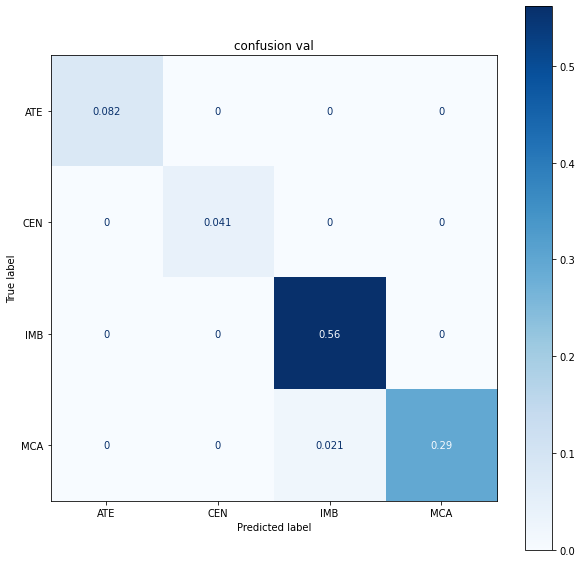

In [43]:
new_train = X_train[top_features]
new_val = X_val[top_features]

model = LogisticRegression(verbose=0, solver='liblinear', random_state=0, C=2, max_iter=20)  
model.fit(new_train, y_train) 

prediccion1 = model.predict(new_val)

print("Accuracy Validation: ", accuracy_score(y_val, prediccion1))
print("F1 score Validation (micro): ", f1_score(y_val, prediccion1, average='micro'))

print("\nMatriz de confusión Modelo 1 sobre Validation")
fig, ax = plt.subplots(figsize=(10, 10))

disp = plot_confusion_matrix(model, new_val, y_val, display_labels=model.classes_, cmap=plt.cm.Blues,normalize='all', ax = ax)
disp.ax_.set_title("confusion val")


## Filtrado individual: Mutual Information

In [44]:
from sklearn.feature_selection import mutual_info_classif

names_candidate_predictors = X_train.columns
names_candidate_predictors

k=len(X_train.columns)
scores = mutual_info_classif(X_train, y_train, discrete_features=False, random_state=0 )

print(scores)
idx_imp = np.argsort(scores)

names_features_MI = [names_candidate_predictors[idx] for idx in idx_imp[-k:]]
names_features_MI.reverse()
print("Atributos ordenados por importancia: \n")
print(names_features_MI)


[0.33965977 0.37169747 0.29400884 0.48316981 0.69002681 0.98456469
 1.05984261 0.20285121 0.02015557 0.02402854 0.07564185 0.97166165
 0.98472449 0.37230939 0.35229896 0.98452603 0.98452603 0.76573224
 0.76573224 0.29117235 0.49104131 0.29964752 0.26397459 0.26752234
 0.23257185 0.41910681 0.5441701  0.31858496 0.36838753 0.5365595
 0.02100735]
Atributos ordenados por importancia: 

['q', 'n', 'a', 'per_y', 'per', 'ad', 'moid_ld', 'moid', 'e', 'sigma_ad', 'sigma_per', 'sigma_a', 'diameter_sigma', 'sigma_ma', 'tp', 'diameter', 'sigma_tp', 'tp_cal', 'H', 'sigma_n', 'sigma_q', 'albedo', 'sigma_e', 'sigma_om', 'sigma_i', 'sigma_w', 'i', 'ma', 'w', 'rms', 'om']


Accuracy Validation:  0.9726027397260274
F1 score Validation (micro):  0.9726027397260274

Matriz de confusión Modelo 1 sobre Validation


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'confusion val')

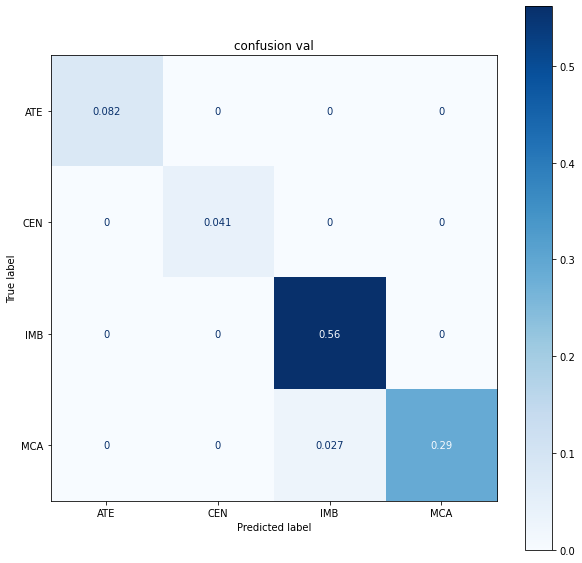

In [45]:
top_features = names_features_MI[:5]

new_train = X_train[top_features]
new_val = X_val[top_features]

model = LogisticRegression(verbose=0, solver='liblinear', random_state=0, C=2, max_iter=20)  
model.fit(new_train, y_train) 

prediccion1 = model.predict(new_val)

print("Accuracy Validation: ", accuracy_score(y_val, prediccion1))
print("F1 score Validation (micro): ", f1_score(y_val, prediccion1, average='micro'))

print("\nMatriz de confusión Modelo 1 sobre Validation")
fig, ax = plt.subplots(figsize=(10, 10))

disp = plot_confusion_matrix(model, new_val, y_val, display_labels=model.classes_, cmap=plt.cm.Blues,normalize='all', ax = ax)
disp.ax_.set_title("confusion val")
